<a href="https://colab.research.google.com/github/pa-tiq/ml-freecodecamp/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Computer Vision

In this guide we will learn how to peform *image classification and object detection/recognition* using deep computer vision with something called a **convolutional neural network**.

The goal of our convolutional neural networks will be to classify and detect images or specific objects from within the image. We will be using image data as our features and a label for those images as our label or output.

We already know how neural networks work so we can skip through the basics and move right into explaining the following concepts.
- Image Data
- Convolutional Layer
- Pooling Layer
- CNN Architectures

The major differences we are about to see in these types of neural networks are the layers that make them up.

##Image Data
So far, we have dealt with pretty straight forward data that has 1 or 2 dimensions. Now we are about to deal with image data that is usually made up of 3 dimensions. These 3 dimensions are as follows:
- image height
- image width
- color channels

The only item in the list above you may not understand is **color channels**. The number of color channels represents the depth of an image and coorelates to the colors used in it. For example, an image with three channels is likely made up of rgb (red, green, blue) pixels. So, for each pixel we have three numeric values in the range 0-255 that define its color. For an image of color depth 1 we would likely have a greyscale image with one value defining each pixel, again in the range of 0-255.

![alt text](http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure1.png)

Keep this in mind as we discuss how our network works and the input/output of each layer. 



##Convolutional Neural Network
**Note:** I will use the term *convnet* and convolutional neural network interchangably.

Each convolutional neural network is made up of one or many convolutional layers. These layers are different than the *dense* layers we have seen previously. Their goal is to find patterns from within images that can be used to classify the image or parts of it. But this may sound familiar to what our densly connected neural network in the previous section was doing, well that's becasue it is. 

The fundemental difference between a dense layer and a convolutional layer is that dense layers detect patterns globally while convolutional layers detect patterns locally. When we have a densly connected layer each node in that layer sees all the data from the previous layer. This means that this layer is looking at all the information and is only capable of analyzing the data in a global capacity. Our convolutional layer however will not be densly connected, this means it can detect local patterns using part of the input data to that layer.

*Let's have a look at how a densly connected layer would look at an image vs how a convolutional layer would.*

This is our image; the goal of our network will be to determine whether this image is a cat or not.
![alt text](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/reference_guide/cat_weight_ref_guide/1800x1200_cat_weight_ref_guide.jpg)

**Dense Layer:** A dense layer will consider the ENTIRE image. It will look at all the pixels and use that information to generate some output.

**Convolutional Layer:** The convolutional layer will look at specific parts of the image. In this example let's say it analyzes the highlighted parts below and detects patterns there.
![alt text](https://drive.google.com/uc?export=view&id=1M7v7S-b-zisFLI_G4ZY_RdUJQrGpJ3zt)

Can you see why this might make these networks more useful?




###How They Work
A dense neural network learns patterns that are present in one specific area of an image. This means if a pattern that the network knows is present in a different area of the image it will have to learn the pattern again in that new area to be able to detect it. 

*Let's use an example to better illustrate this.*

We'll consider that we have a dense neural network that has learned what an eye looks like from a sample of dog images.

![alt text](https://drive.google.com/uc?export=view&id=16FJKkVS_lZToQOCOOy6ohUpspWgtoQ-c)

Let's say it's determined that an image is likely to be a dog if an eye is present in the boxed off locations of the image above.

Now let's flip the image.
![alt text](https://drive.google.com/uc?export=view&id=1V7Dh7BiaOvMq5Pm_jzpQfJTZcpPNmN0W)

Since our densly connected network has only recognized patterns globally it will look where it thinks the eyes should be present. Clearly it does not find them there and therefore would likely determine this image is not a dog. Even though the pattern of the eyes is present, it's just in a different location.

Since convolutional layers learn and detect patterns from different areas of the image, they don't have problems with the example we just illustrated. They know what an eye looks like and by analyzing different parts of the image can find where it is present. 



###Multiple Convolutional Layers
In our models it is quite common to have more than one convolutional layer. Even the basic example we will use in this guide will be made up of 3 convolutional layers. These layers work together by increasing complexity and abstraction at each subsequent layer. The first layer might be responsible for picking up edges and short lines, while the second layer will take as input these lines and start forming shapes or polygons. Finally, the last layer might take these shapes and determine which combiantions make up a specific image.





##Feature Maps
You may see me use the term *feature map* throughout this tutorial. This term simply stands for a 3D tensor with two spacial axes (width and height) and one depth axis. Our convolutional layers take feature maps as their input and return a new feature map that reprsents the prescence of spcific filters from the previous feature map. These are what we call *response maps*.

##Layer Parameters
A convolutional layer is defined by two key parameters.

####**Filters**
A filter is a m x n pattern of pixels that we are looking for in an image. The number of filters in a convolutional layer reprsents how many patterns each layer is looking for and what the depth of our response map will be. If we are looking for 32 different patterns/filters than our output feature map (aka the response map) will have a depth of 32. Each one of the 32 layers of depth will be a matrix of some size containing values indicating if the filter was present at that location or not.

Here's a great illustration from the book "Deep Learning with Python" by Francois Chollet (pg 124).
![alt text](https://drive.google.com/uc?export=view&id=1HcLvvLKvLCCGuGZPMvKYz437FbbCC2eB)

####**Sample Size**
This isn't really the best term to describe this, but each convolutional layer is going to examine n x m blocks of pixels in each image. Typically, we'll consider 3x3 or 5x5 blocks. In the example above we use a 3x3 "sample size". This size will be the same as the size of our filter. 

Our layers work by sliding these filters of n x m pixels over every possible position in our image and populating a new feature map/response map indicating whether the filter is present at each location. 




##Borders and Padding
The more mathematical of you may have realized that if we slide a filter of let's say size 3x3 over our image well consider less positions for our filter than pixels in our input. Look at the example below. 

*Image from "Deep Learning with Python" by Francois Chollet (pg 126).*
![alt text](https://drive.google.com/uc?export=view&id=1OEfXrV16NBjwAafgBfYYcWOyBCHqaZ5M)

This means our response map will have a slightly smaller width and height than our original image. This is fine but sometimes we want our response map to have the same dimensions. We can accomplish this by using something called *padding*.

**Padding** is simply the addition of the appropriate number of rows and/or columns to your input data such that each pixel can be centered by the filter.

##Strides
In the previous sections we assumed that the filters would be slid continously through the image such that it covered every possible position. This is common but sometimes we introduce the idea of a **stride** to our convolutional layer. The stride size reprsents how many rows/cols we will move the filter each time. These are not used very frequently so we'll move on.

##Pooling
You may recall that our convnets are made up of a stack of convolution and pooling layers.

The idea behind a pooling layer is to downsample our feature maps and reduce their dimensions. They work in a similar way to convolutional layers where they extract windows from the feature map and return a response map of the max, min or average values of each channel. Pooling is usually done using windows of size 2x2 and a stride of 2. This will reduce the size of the feature map by a factor of two and return a response map that is 2x smaller.

##A More Detailed Look
Please refer to the video to learn how all of this happens at the lower level! 

##Creating a Convnet

Now it is time to create our first convnet! This example is for the purpose of getting familiar with CNN architectures, we will talk about how to improves its performance later.

*This tutorial is based on the following guide from the TensorFlow documentation: https://www.tensorflow.org/tutorials/images/cnn*

###Dataset
The problem we will consider here is classifying 10 different everyday objects. The dataset we will use is built into tensorflow and called the [**CIFAR Image Dataset.**](https://www.cs.toronto.edu/~kriz/cifar.html) It contains 60,000 32x32 color images with 6000 images of each class. 

The labels in this dataset are the following:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

We'll load the dataset and have a look at some of the images below.




In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 3s 0us/step


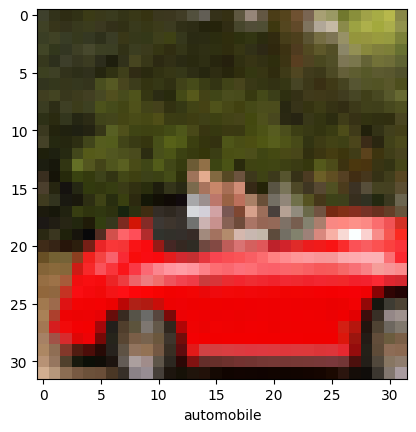

In [4]:
# Let's look at a one image
IMG_INDEX = 99  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

##Convolutional Neural Network Architecture
A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few denesly connected layers. To idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of features.

We will start by building the **Convolutional Base**.

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

**Layer 1**

The input shape of our data will be 32, 32, 3 and we will process 32 filters of size 3x3 over our input data. We will also apply the activation function relu to the output of each convolution operation.

**Layer 2**

This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

**Other Layers**

The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth.

In [6]:
model.summary()  # let's have a look at our model so far

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

After looking at the summary you should notice that the depth of our image increases but the spacial dimensions reduce drastically.

##Adding Dense Layers
So far, we have just completed the **convolutional base**. Now we need to take these extracted features and add a way to classify them. This is why we add the following layers to our model.



In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

We can see that the flatten layer changes the shape of our data so that we can feed it to the 64-node dense layer, follwed by the final output layer of 10 neurons (one for each class).



##Training
Now we will train and compile the model using the recommended hyper paramaters from tensorflow.

*Note: This will take much longer than previous models!*

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=4, 
                    validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 [==============================] - 87s 55ms/step - loss: 1.5252 - accuracy: 0.4482 - val_loss: 1.2244 - val_accuracy: 0.5611
Epoch 2/4
1563/1563 [==============================] - 86s 55ms/step - loss: 1.1491 - accuracy: 0.5926 - val_loss: 1.1034 - val_accuracy: 0.6097
Epoch 3/4
1563/1563 [==============================] - 83s 53ms/step - loss: 1.0056 - accuracy: 0.6458 - val_loss: 0.9599 - val_accuracy: 0.6652
Epoch 4/4
1563/1563 [==============================] - 85s 54ms/step - loss: 0.9178 - accuracy: 0.6804 - val_loss: 0.9281 - val_accuracy: 0.6769


##Evaluating the Model
We can determine how well the model performed by looking at it's performance on the test data set.

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 4s - loss: 0.9281 - accuracy: 0.6769 - 4s/epoch - 13ms/step
0.6769000291824341


You should be getting an accuracy of about 70%. This isn't bad for a simple model like this, but we'll dive into some better approaches for computer vision below.



##Working with Small Datasets
In the situation where you don't have millions of images it is difficult to train a CNN from scratch that performs very well. This is why we will learn about a few techniques we can use to train CNN's on small datasets of just a few thousand images. 

###Data Augmentation
To avoid overfitting and create a larger dataset from a smaller one we can use a technique called data augmentation. This is simply performing random transformations on our images so that our model can generalize better. These transformations can be things like compressions, rotations, stretches and even color changes. 

Fortunately, keras can help us do this. Look at the code below to an example of data augmentation.



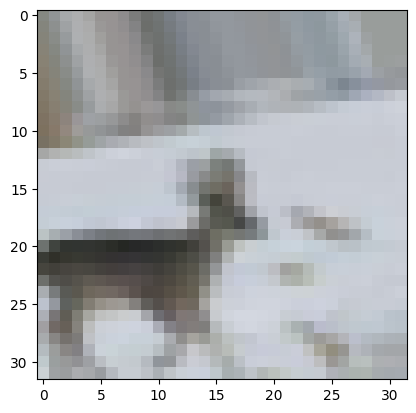

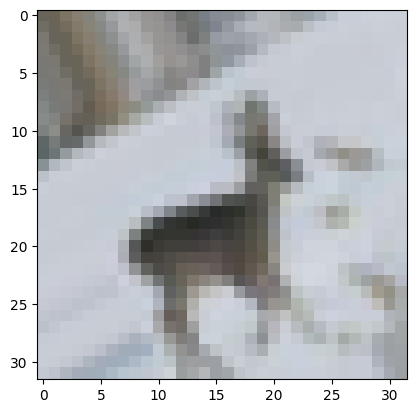

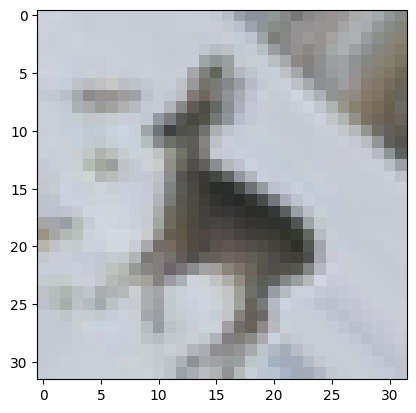

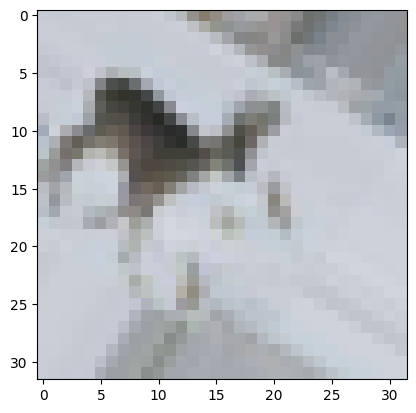

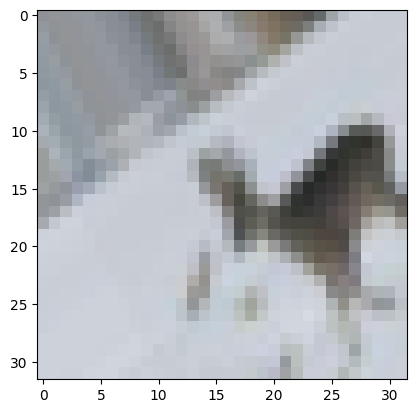

In [13]:
# from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array


# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = train_images[20]
img = img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()


###Pretrained Models
You would have noticed that the model above takes a few minutes to train in the NoteBook and only gives an accuaracy of ~70%. This is okay but surely there is a way to improve on this. 

In this section we will talk about using a pretrained CNN as apart of our own custom network to improve the accuracy of our model. We know that CNN's alone (with no dense layers) don't do anything other than map the presence of features from our input. This means we can use a pretrained CNN, one trained on millions of images, as the start of our model. This will allow us to have a very good convolutional base before adding our own dense layered classifier at the end. In fact, by using this techique we can train a very good classifier for a realtively small dataset (< 10,000 images). This is because the convnet already has a very good idea of what features to look for in an image and can find them very effectively. So, if we can determine the presence of features all the rest of the model needs to do is determine which combination of features makes a specific image.



###Fine Tuning
When we employ the technique defined above, we will often want to tweak the final layers in our convolutional base to work better for our specific problem. This involves not touching or retraining the earlier layers in our convolutional base but only adjusting the final few. We do this because the first layers in our base are very good at extracting low level features lile lines and edges, things that are similar for any kind of image. Where the later layers are better at picking up very specific features like shapes or even eyes. If we adjust the final layers than we can look for only features relevant to our very specific problem.



##Using a Pretrained Model
In this section we will combine the tecniques we learned above and use a pretrained model and fine tuning to classify images of dogs and cats using a small dataset.

*This tutorial is based on the following guide from the TensorFlow documentation: https://www.tensorflow.org/tutorials/images/transfer_learning*




In [ ]:
#Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

###Dataset
We will load the *cats_vs_dogs* dataset from the modoule tensorflow_datatsets.

This dataset contains (image, label) pairs where images have different dimensions and 3 color channels.



In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# split the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [ ]:
get_label_name = metadata.features['label'].int2str  # creates a function object that we can use to get labels

# display 2 images from the dataset
for image, label in raw_train.take(5):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

###Data Preprocessing
Since the sizes of our images are all different, we need to convert them all to the same size. We can create a function that will do that for us below.



In [ ]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  """
  returns an image that is reshaped to IMG_SIZE
  """
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

Now we can apply this function to all our images using ```.map()```.

In [ ]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

Let's have a look at our images now.

In [ ]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

Finally we will shuffle and batch the images.

In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

Now if we look at the shape of an original image vs the new image we will see it has been changed.

In [ ]:
for img, label in raw_train.take(2):
  print("Original shape:", img.shape)

for img, label in train.take(2):
  print("New shape:", img.shape)

###Picking a Pretrained Model
The model we are going to use as the convolutional base for our model is the **MobileNet V2** developed at Google. This model is trained on 1.4 million images and has 1000 different classes.

We want to use this model but only its convolutional base. So, when we load in the model, we'll specify that we don't want to load the top (classification) layer. We'll tell the model what input shape to expect and to use the predetermined weights from *imagenet* (Googles dataset).



In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
base_model.summary()

At this point this *base_model* will simply output a shape (32, 5, 5, 1280) tensor that is a feature extraction from our original (1, 160, 160, 3) image. The 32 means that we have 32 layers of differnt filters/features.

In [ ]:
for image, _ in train_batches.take(1):
   pass

feature_batch = base_model(image)
print(feature_batch.shape)

###Freezing the Base
The term **freezing** refers to disabling the training property of a layer. It simply means we won’t make any changes to the weights of any layers that are frozen during training. This is important as we don't want to change the convolutional base that already has learned weights.



In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

###Adding our Classifier
Now that we have our base layer setup, we can add the classifier. Instead of flattening the feature map of the base layer we will use a global average pooling layer that will average the entire 5x5 area of each 2D feature map and return to us a single 1280 element vector per filter.  



In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

Finally, we will add the predicition layer that will be a single dense neuron. We can do this because we only have two classes to predict for.




In [ ]:
prediction_layer = keras.layers.Dense(1)

Now we will combine these layers together in a model.

In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [ ]:
model.summary()

###Training the Model
Now we will train and compile the model. We will use a very small learning rate to ensure that the model does not have any major changes made to it.

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# We can evaluate the model right now to see how it does before training it on our new images
initial_epochs = 3
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

In [ ]:
# Now we can train it on our images
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

acc = history.history['accuracy']
print(acc)

In [ ]:
model.save("dogs_vs_cats.h5")  # we can save the model and reload it at anytime in the future
new_model = tf.keras.models.load_model('dogs_vs_cats.h5')

And that's it for this section on computer vision!

##Object Detection
If you'd like to learn how you can perform object detection and recognition with tensorflow check out the guide below.

https://github.com/tensorflow/models/tree/master/research/object_detection

##Sources
1. “Convolutional Neural Network (CNN) &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/images/cnn.
2. “Transfer Learning with a Pretrained ConvNet &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/images/transfer_learning.
3. Chollet François. Deep Learning with Python. Manning Publications Co., 2018.

